# Beam shape analysis

In this script we demonstrate how the shape of an elliptical beam shape can be calculated when it propagates in free space and under the effect of a cylindrical lens.

In [1]:
from modules.elliptical_gaussian_beam_shape import *
import numpy as np
from toolkits.plotting_helper import *
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
b = EllipticalGaussianBeam(
    initial_z = 0, 
    z0_x = 0, 
    z0_y = 0,
    theta = 89.9 * np.pi / 180,
    w0_x = -10e-6, 
    w0_y = -20e-6, 
    wavelength = 420e-9)

zvals = np.arange(0, 20e-3, 0.005e-3)
shapes = [b.get_beam_shape()]
ind_lens = 500
for i in tqdm(range(1, len(zvals))):
    b.evolve(zvals[i] - zvals[i-1])
    if i == ind_lens:
        b.apply_elliptical_lens(CylindricalLens(np.pi/3, b.wavelength, f=1e-3))
    sh = b.get_beam_shape()
    
    if i > 1:
        if np.abs(sh.orientation - last_angle) > np.pi / 4:
            candidates = np.arange(-2, 3)
            k = np.argmin(np.abs(candidates * np.pi / 2 + sh.orientation - last_angle))
            candidate = candidates[k]

            if k % 2 == 1:
                sh.radius_x, sh.radius_y = sh.radius_y, sh.radius_x
            oa = sh.orientation
            sh.orientation += candidate * np.pi / 2

    last_angle = sh.orientation
    shapes.append(sh)

  0%|          | 0/3999 [00:00<?, ?it/s]

100%|██████████| 3999/3999 [00:00<00:00, 17100.08it/s]


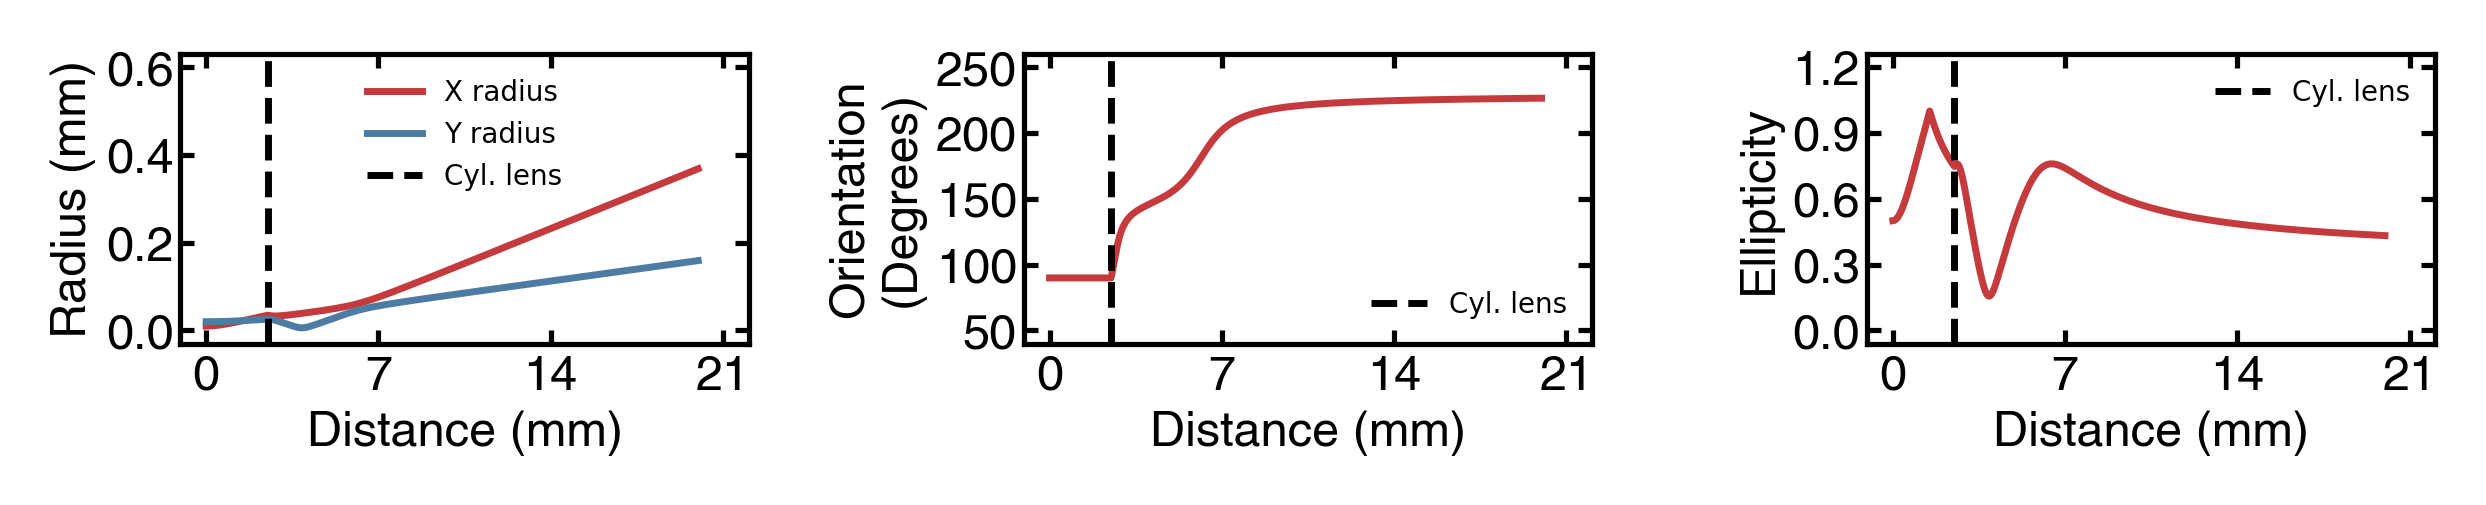

In [3]:
fig, ax = getStylishFigureAxesWithTotalCount(3, ncols = 3, dpi=500)

PlotPlotter(
    fig,
    ax[0],
    zvals * 1e3,
    [s.radius_x * 1e3 for s in shapes],
    xlabel = "Distance (mm)",
    ylabel = "Radius (mm)",
    style = dict(label = "X radius", marker = "None", linestyle = "-", linewidth = 1)
).draw()

PlotPlotter(
    fig,
    ax[0],
    zvals * 1e3,
    [s.radius_y * 1e3 for s in shapes],
    style = {"label": "Y radius", "linestyle": "-", "marker": "None", "linewidth": 1},
).draw()

PlotPlotter(
    fig,
    ax[1],
    zvals * 1e3,
    [s.orientation * 180 / np.pi for s in shapes],
    xlabel = "Distance (mm)",
    ylabel = "Orientation\n(Degrees)",
    style = dict(marker = "None", linestyle = "-", linewidth = 1)
).draw()

PlotPlotter(
    fig,
    ax[2],
    zvals * 1e3,
    [s.ellipticity for s in shapes],
    xlabel = "Distance (mm)",
    ylabel = "Ellipticity",
    ylim = [-0.1, 1.1],
    style = dict(marker = "None", linestyle = "-", linewidth = 1)
).draw()

for i in range(len(ax)):
    ax[i].axvline(zvals[ind_lens] * 1e3, lw=1, color="black", linestyle="--", label = "Cyl. lens")
    ax[i].legend(fontsize=4, frameon=False)
    automateAxisTicks(ax[i])
    automateAxisLimitsByTicks(ax[i])

plt.tight_layout()
plt.show()